In [1]:
import pandas as pd
import numpy as np
import glob
import csv
import os
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [105]:
df_initiation = pd.read_csv('Initiation.csv')
df_disposition = pd.read_csv('Dispositions.csv')
df_intake = pd.read_csv('Intake.csv')
df_sentence = pd.read_csv('Sentencing.csv')
df_diversion = pd.read_csv('Diversion.csv')

In [112]:
rows_intake = ['CASE_PARTICIPANT_ID', 'ARREST_DATE', 'OFFENSE_CATEGORY','AGE_AT_INCIDENT','RACE','GENDER','INCIDENT_CITY']
df_intake = df_intake[rows_intake]

#Create two value pairs from df to identify the datatypes and null values
null_ = df_intake.isna().any()
dtypes = df_intake.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print(info)

                      Null     type
CASE_PARTICIPANT_ID  False    int64
ARREST_DATE           True   object
OFFENSE_CATEGORY     False   object
AGE_AT_INCIDENT       True  float64
RACE                  True   object
GENDER                True   object
INCIDENT_CITY         True   object


In [110]:
rows_initiation = ['CASE_PARTICIPANT_ID', 'ARREST_DATE', 'CHARGE_OFFENSE_TITLE','OFFENSE_CATEGORY','BOND_TYPE_CURRENT','BOND_TYPE_CURRENT','BOND_AMOUNT_INITIAL']
df_initiation = df_initiation[rows_initiation].copy()

#Create two value pairs from df to identify the datatypes and null values
null_ = df_initiation.isna().any()
dtypes = df_initiation.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print(info)

                       Null     type
CASE_PARTICIPANT_ID   False    int64
ARREST_DATE            True   object
CHARGE_OFFENSE_TITLE  False   object
OFFENSE_CATEGORY      False   object
BOND_TYPE_CURRENT      True   object
BOND_TYPE_CURRENT      True   object
BOND_AMOUNT_INITIAL    True  float64


In [245]:
df_initiation = df_initiation.dropna()

In [111]:
rows_sentence = ['CASE_PARTICIPANT_ID', 'CHARGE_ID','CHARGE_COUNT', 'ARREST_DATE','OFFENSE_CATEGORY','UPDATED_OFFENSE_CATEGORY','SENTENCE_PHASE','SENTENCE_TYPE','COMMITMENT_TYPE','CURRENT_SENTENCE_FLAG','CURRENT_SENTENCE_FLAG','LENGTH_OF_CASE_in_Days']
df_sentence = df_sentence[rows_sentence].copy()

#Create two value pairs from df to identify the datatypes and null values
null_ = df_sentence.isna().any()
dtypes = df_sentence.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print(info)

                           Null     type
CASE_PARTICIPANT_ID       False    int64
CHARGE_ID                 False    int64
CHARGE_COUNT              False    int64
ARREST_DATE                True   object
OFFENSE_CATEGORY          False   object
UPDATED_OFFENSE_CATEGORY  False   object
SENTENCE_PHASE            False   object
SENTENCE_TYPE             False   object
COMMITMENT_TYPE            True   object
CURRENT_SENTENCE_FLAG     False     bool
CURRENT_SENTENCE_FLAG     False     bool
LENGTH_OF_CASE_in_Days     True  float64


In [107]:
rows_diversion = ['CASE_ID', 'CASE_PARTICIPANT_ID','DIVERSION_PROGRAM','RECEIVED_DATE','OFFENSE_CATEGORY','DIVERSION_COUNT','PRIMARY_CHARGE_OFFENSE_TITLE','DIVERSION_RESULT']
df_diversion = df_diversion[rows_diversion].copy()

#Create two value pairs from df to identify the datatypes and null values
null_ = df_diversion.isna().any()
dtypes = df_diversion.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print(info)

                               Null    type
CASE_ID                       False   int64
CASE_PARTICIPANT_ID           False   int64
DIVERSION_PROGRAM             False  object
RECEIVED_DATE                 False  object
OFFENSE_CATEGORY              False  object
DIVERSION_COUNT               False   int64
PRIMARY_CHARGE_OFFENSE_TITLE  False  object
DIVERSION_RESULT               True  object


In [109]:
row_disposition = ['CASE_PARTICIPANT_ID', 'CHARGE_COUNT', 'CHARGE_ID', 'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_DISPOSITION','FELONY_REVIEW_DATE']
df_disposition = df_disposition[row_disposition].copy()

#Create two value pairs from df to identify the datatypes and null values
null_ = df_disposition.isna().any()
dtypes = df_disposition.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print(info)

                                    Null    type
CASE_PARTICIPANT_ID                False   int64
CHARGE_COUNT                       False   int64
CHARGE_ID                          False   int64
DISPOSITION_CHARGED_OFFENSE_TITLE  False  object
CHARGE_DISPOSITION                 False  object
FELONY_REVIEW_DATE                  True  object


In [88]:
city_count = df_intake.groupby('INCIDENT_CITY')['INCIDENT_CITY'].size()
city_count = city_count.sort_values(ascending= True).tail(20)

Incident city by intake case

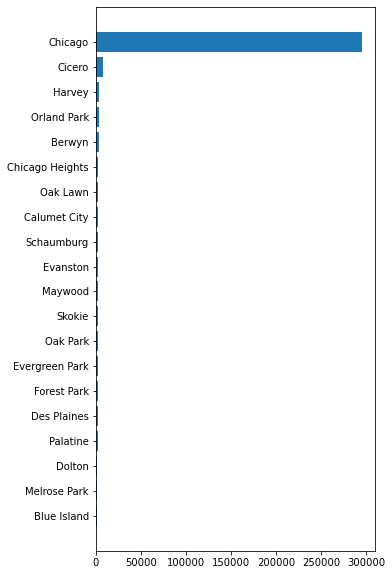

In [89]:
plt.figure(figsize=(5,10))
plt.barh(city_count.index, city_count)
plt.show()

Charge type by Charge count

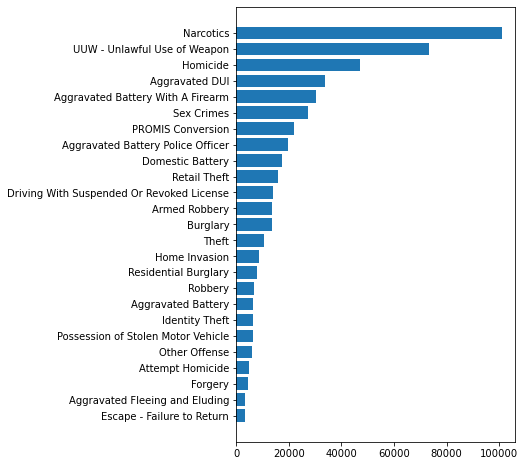

In [90]:
charge_count = df_sentence.groupby('UPDATED_OFFENSE_CATEGORY')['CHARGE_COUNT'].sum()
charge_count = charge_count.sort_values(ascending= True).tail(25)

plt.figure(figsize=(5,8))
plt.barh(charge_count.index, charge_count)
plt.show()

Charge type by Charge count

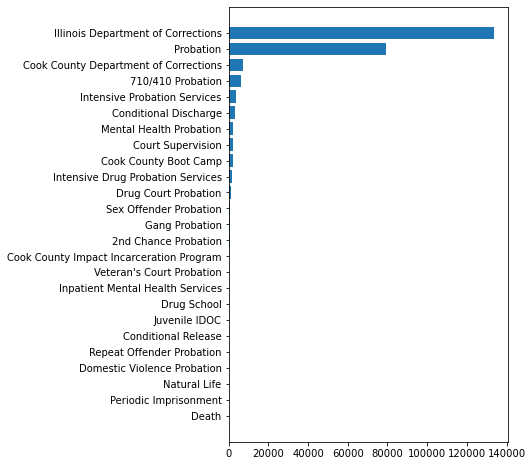

In [91]:
charge_count = df_sentence.groupby('COMMITMENT_TYPE')['CHARGE_COUNT'].size()
charge_count = charge_count.sort_values(ascending= True).tail(25)

plt.figure(figsize=(5,8))
plt.barh(charge_count.index, charge_count)
plt.show()

In [92]:
charge_count = charge_count.reset_index()

Race distribution by intake case

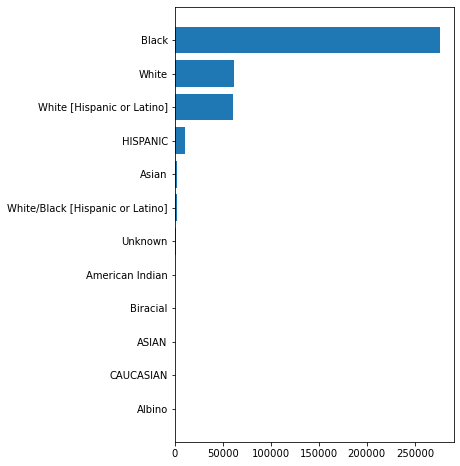

In [93]:
race_count = df_intake.groupby('RACE')['RACE'].size()
race_count = race_count.sort_values(ascending= True)

plt.figure(figsize=(5,8))
plt.barh(race_count.index, race_count)
plt.show()

Total charges 30-day rolling average by arrest date, last 10 years

In [254]:
date_ = '2012-01-01'
df_sentence['ARREST_DATE'] = pd.to_datetime(df_sentence['ARREST_DATE']).dt.date
df_sentence_post = df_sentence[df_sentence['ARREST_DATE'] >= pd.to_datetime(date_)]
df_sentence_pre = df_sentence[df_sentence['ARREST_DATE'] <= pd.to_datetime(date_)]


df_sentence_post = df_sentence_post.groupby('ARREST_DATE')['CHARGE_COUNT'].sum().reset_index()
df_sentence_post['CHARGE_COUNT'] = df_sentence_post['CHARGE_COUNT'].rolling(30).mean().sort_values().dropna()

Total charges 30-day rolling average by arrest date, last 10 years

<AxesSubplot:xlabel='ARREST_DATE', ylabel='CHARGE_COUNT'>

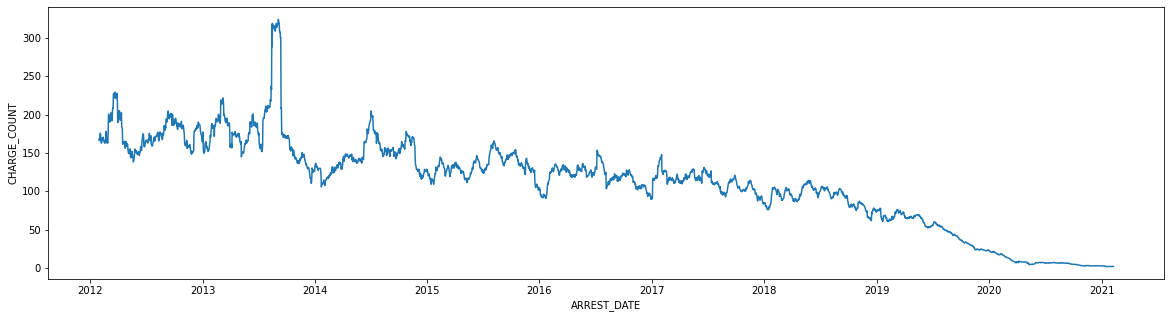

In [251]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_sentence_TS, x='ARREST_DATE', y= 'CHARGE_COUNT')

Lets look at the years prior to the last 10 years

In [256]:
df_sentence_pre = df_sentence_pre.groupby('ARREST_DATE')['CHARGE_COUNT'].sum().reset_index()
df_sentence_pre['CHARGE_COUNT'] = df_sentence_pre['CHARGE_COUNT'].rolling(30).mean().sort_values().dropna()

<AxesSubplot:xlabel='ARREST_DATE', ylabel='CHARGE_COUNT'>

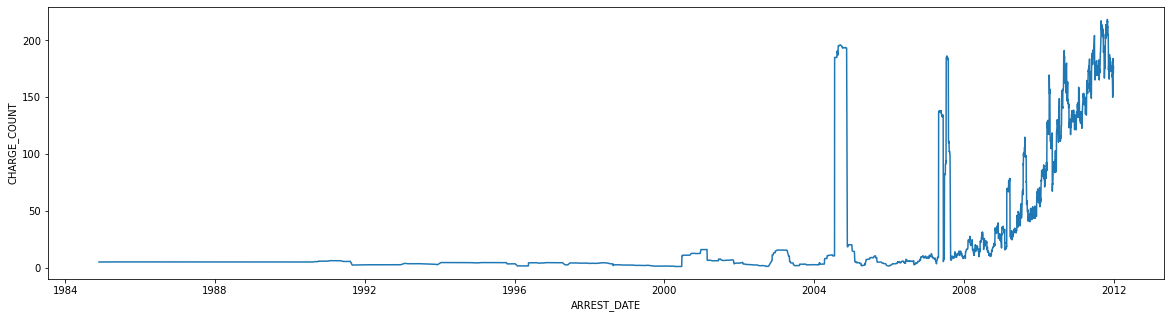

In [257]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_sentence_pre, x='ARREST_DATE', y= 'CHARGE_COUNT')

There is a large difference in total charges

In [194]:
df_sentence_post_grouped = df_sentence_post.groupby(['SENTENCE_TYPE'])['CHARGE_COUNT'].mean().reset_index()
df_sentence_pre_grouped = df_sentence_pre.groupby(['SENTENCE_TYPE'])['CHARGE_COUNT'].mean().reset_index()

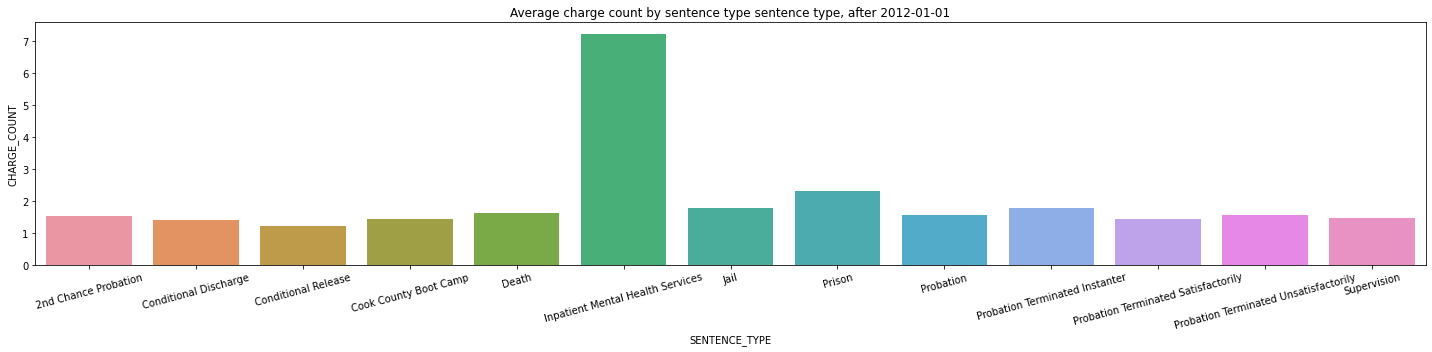

In [199]:
plt.figure(figsize=(20,5))
pre_2012 = sns.barplot(x='SENTENCE_TYPE', y="CHARGE_COUNT",
                data=df_sentence_post_grouped)
pre_2012.set_title('Average charge count by sentence type sentence type, after 2012-01-01')
plt.xticks(rotation=15)
plt.tight_layout()

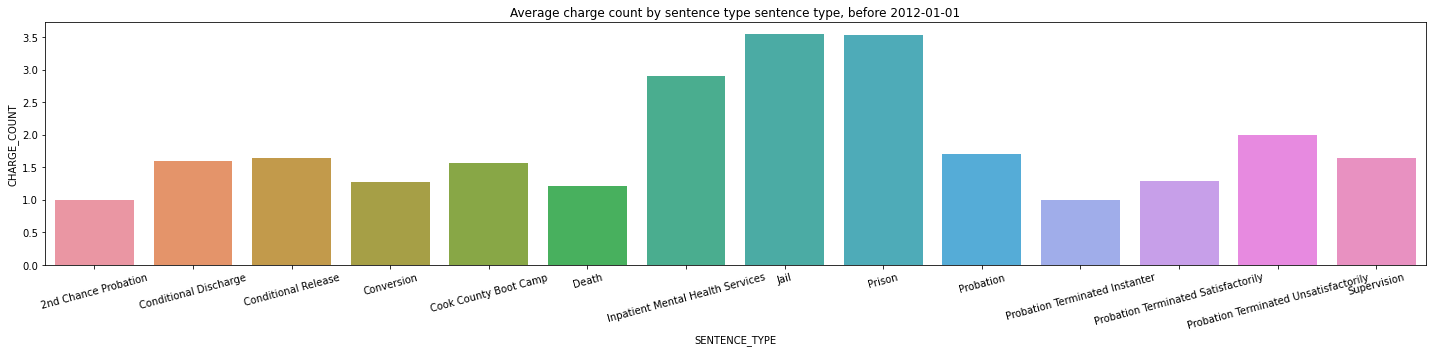

In [198]:
plt.figure(figsize=(20,5))
pre_2012 = sns.barplot(x='SENTENCE_TYPE', y="CHARGE_COUNT",
                data=df_sentence_pre_grouped)
pre_2012.set_title('Average charge count by sentence type sentence type, before 2012-01-01')
plt.xticks(rotation=15)
plt.tight_layout()

Inpatient Mental Health Services setneces has a higher average charge count than prior to 10 years ago

In [219]:
date_ = '2012-01-01'
df_diversion['RECEIVED_DATE'] = pd.to_datetime(df_diversion['RECEIVED_DATE']).dt.date
df_diversion_post = df_diversion[df_diversion['RECEIVED_DATE'] >= pd.to_datetime(date_)]
df_diversion_pre = df_diversion[df_diversion['RECEIVED_DATE'] <= pd.to_datetime(date_)]

df_diversion_result_pre = df_diversion_pre.groupby(['OFFENSE_CATEGORY','DIVERSION_RESULT'])['DIVERSION_COUNT'].sum().reset_index()
df_diversion_result_post = df_diversion_post.groupby(['OFFENSE_CATEGORY','DIVERSION_RESULT'])['DIVERSION_COUNT'].sum().reset_index()

In [239]:
df_diversion_result_pre_grouped = df_diversion_result_pre.sort_values(by='DIVERSION_COUNT', ascending=False).head(15)
df_diversion_result_post_grouped = df_diversion_result_post.sort_values(by='DIVERSION_COUNT', ascending=False).head(15)

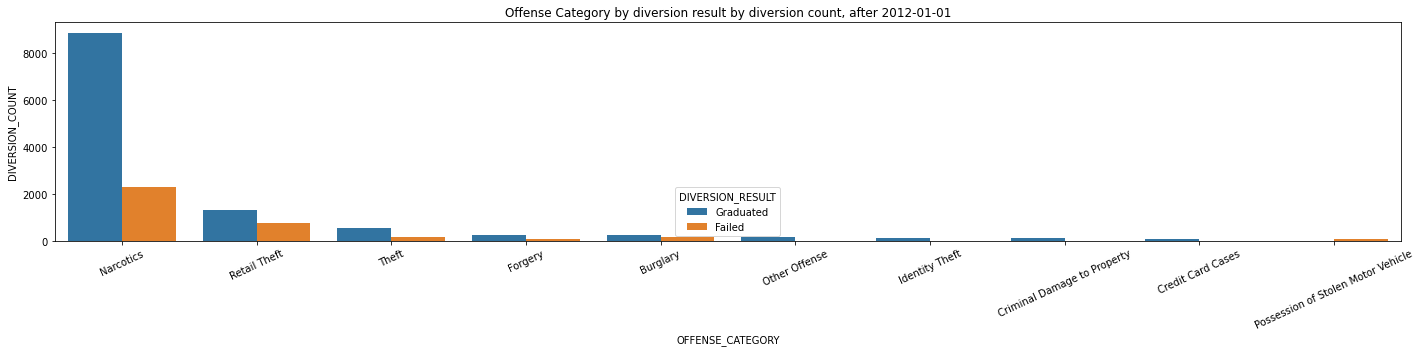

In [259]:
plt.figure(figsize=(20,5))
pre_2012 = sns.barplot(x='OFFENSE_CATEGORY', y="DIVERSION_COUNT", hue = 'DIVERSION_RESULT',
                data=df_diversion_result_post_grouped)
pre_2012.set_title('Offense Category by diversion result by diversion count, after 2012-01-01')
plt.xticks(rotation=25)
plt.tight_layout()

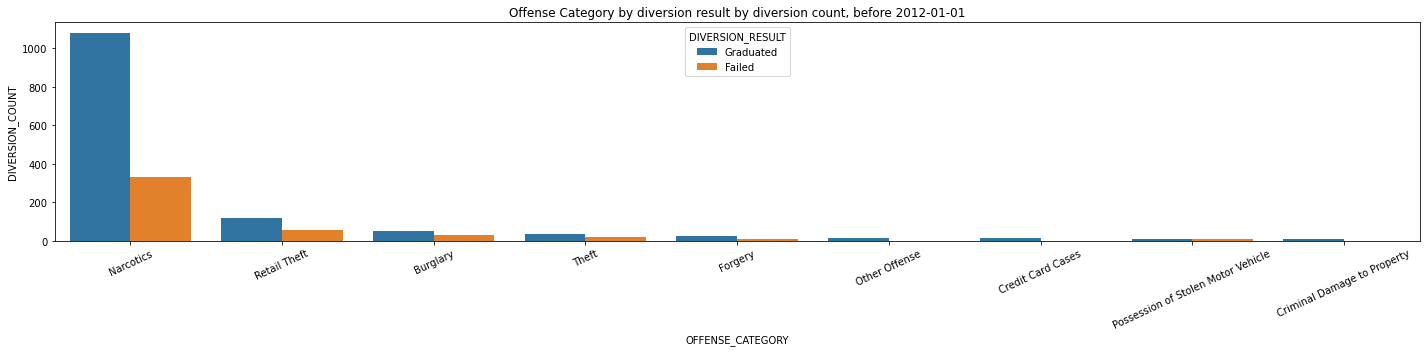

In [260]:
plt.figure(figsize=(20,5))
pre_2012 = sns.barplot(x='OFFENSE_CATEGORY', y="DIVERSION_COUNT", hue = 'DIVERSION_RESULT',
                data=df_diversion_result_pre_grouped)
pre_2012.set_title('Offense Category by diversion result by diversion count, before 2012-01-01')
plt.xticks(rotation=25)
plt.tight_layout()

Diversion count does not seem to charge signficantly prior to 10 years ago